# Loading the Saved Model
In this notebook I will load the PPO model in use it to make predictions

## Steps:
The same steps that we performed while training the model will be performed again. 

1. Importing Libraries
2. Import and read Data
3. Data preprocessing
4. Environment Creation
5. Feature Engineering
but now instead of training the model we will load it.

In [1]:
# Gym stuff
import gym
from stable_baselines3 import PPO
import gym_anytrading

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/Users/raunakpandey/rl-test/aapl/AAPL.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [4]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
251,2021-08-12,146.19,149.05,145.84,148.89,"73,779,109"
250,2021-08-13,148.97,149.44,148.27,149.10,"59,375,008"
249,2021-08-16,148.54,151.19,146.47,151.12,"103,558,797"
248,2021-08-17,150.23,151.68,149.09,150.19,"92,229,742"
247,2021-08-18,149.80,150.72,146.15,146.36,"86,325,992"


In [5]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-08-12,146.19,149.05,145.84,148.89,"73,779,109"
2021-08-13,148.97,149.44,148.27,149.10,"59,375,008"
2021-08-16,148.54,151.19,146.47,151.12,"103,558,797"
2021-08-17,150.23,151.68,149.09,150.19,"92,229,742"
2021-08-18,149.80,150.72,146.15,146.36,"86,325,992"


In [6]:
env = gym.make('stocks-v0', df=df, frame_bound=(10,100), window_size=5)
env.reset()

array([[ 1.4819e+02,  1.4900e+00],
       [ 1.4971e+02,  1.5200e+00],
       [ 1.4962e+02, -9.0000e-02],
       [ 1.4836e+02, -1.2600e+00],
       [ 1.4754e+02, -8.2000e-01]])

In [7]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [8]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [9]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [10]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [11]:
df.head(10)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-08-12,146.19,149.05,145.84,148.89,73779109.0,0.0,0.000000,0.0
2021-08-13,148.97,149.44,148.27,149.10,59375008.0,0.0,100.000000,59375008.0
2021-08-16,148.54,151.19,146.47,151.12,103558797.0,0.0,100.000000,162933805.0
2021-08-17,150.23,151.68,149.09,150.19,92229742.0,0.0,68.862848,70704063.0
2021-08-18,149.80,150.72,146.15,146.36,86325992.0,0.0,28.922370,-15621929.0
2021-08-19,145.03,148.00,144.50,146.70,86960312.0,0.0,32.656494,71338383.0
2021-08-20,147.44,148.50,146.78,148.19,60549633.0,0.0,46.036296,131888016.0
2021-08-23,148.31,150.19,147.89,149.71,60131809.0,0.0,55.704678,192019825.0
2021-08-24,149.45,150.86,149.15,149.62,48606434.0,0.0,55.075471,143413391.0


In [12]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [13]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [14]:
env2.signal_features

array([[ 1.45840000e+02,  7.37791090e+07,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.48270000e+02,  5.93750080e+07,  0.00000000e+00,
         1.00000000e+02,  5.93750080e+07],
       [ 1.46470000e+02,  1.03558797e+08,  0.00000000e+00,
         1.00000000e+02,  1.62933805e+08],
       [ 1.49090000e+02,  9.22297420e+07,  0.00000000e+00,
         6.88628483e+01,  7.07040630e+07],
       [ 1.46150000e+02,  8.63259920e+07,  0.00000000e+00,
         2.89223697e+01, -1.56219290e+07],
       [ 1.44500000e+02,  8.69603120e+07,  0.00000000e+00,
         3.26564945e+01,  7.13383830e+07],
       [ 1.46780000e+02,  6.05496330e+07,  0.00000000e+00,
         4.60362961e+01,  1.31888016e+08],
       [ 1.47890000e+02,  6.01318090e+07,  0.00000000e+00,
         5.57046784e+01,  1.92019825e+08],
       [ 1.49150000e+02,  4.86064340e+07,  0.00000000e+00,
         5.50754709e+01,  1.43413391e+08],
       [ 1.47800000e+02,  5.89913010e+07,  0.00000000e+00,
         4.70609806e+01

### __6.Loading the Model__
Now I will load the model the I had previosly trained

In [15]:
# Linking to the model's directory
models_dir = "models/PPO"
model_path=f"{models_dir}/290000.zip"

In [16]:
from stable_baselines3.common.vec_env import DummyVecEnv
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [17]:
# using stable baselines .load
model= PPO.load(model_path,env=env)

In [18]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(20,100))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs,deterministic=True)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 34.95999999999998, 'total_profit': 1.0415459036581969, 'position': 1}


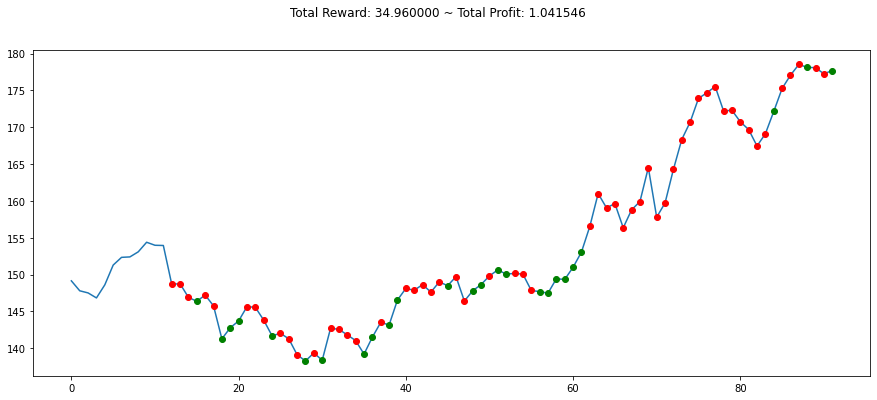

In [19]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## __7.Conclusion__
The model is able to give a decent profit of 6.34% for a period of 60 days at its best. The model can be imporved by using data of higher frequency but this would be computationally expensive. 
In conclusion the project shows the power of reinforcement learning in finance. 